# Linear Regression

## Glossary
#### 1. Import Libraries
#### 2. Importing File
#### 3. Check For Missing Values
#### 4. Check for Duplicates
#### 5. Scatter Plots
#### 6. Creating Arrays for Analysis
#### 7. Regression Analysis

### 1. Import libraries

In [18]:
#import math, visualization and data analysis/science libraries, plus display graphs in notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

### 2. Importing File

In [3]:
path = r'C:\Users\Nuno\05-2024 AirBnB Amsterdam Analysis'
#importing cleaned dataset
reviews_dataset = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'df_review_scores_analysis_cleaned.csv'))

In [6]:
reviews_dataset.columns

Index(['host_response_time', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [5]:
#Drop unnamed column
reviews_dataset.drop(columns='Unnamed: 0',inplace=True)

In [7]:
reviews_dataset.head()

,host_response_time,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,within an hour,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,2,59,3,15,44,248,97,strict_14_with_grace_period,1,2.10
1,within an hour,Westerpark,52.390225,4.873924,Apartment,Entire home/apt,5,160,4,20,47,42,96,moderate,1,1.03
2,within a few hours,Centrum-Oost,52.365087,4.893541,Townhouse,Entire home/apt,2,80,1,1000,198,233,87,strict_14_with_grace_period,2,2.18
3,within a few hours,Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,3,125,14,60,141,1,100,strict_14_with_grace_period,2,0.09
4,within an hour,Centrum-West,52.386727,4.892078,Houseboat,Private room,2,150,2,730,199,171,99,strict_14_with_grace_period,1,2.03


In [8]:
#Creating dataframe with  only numeric columns
reviews_dataset_num = reviews_dataset[['accommodates', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating',
       'calculated_host_listings_count', 'reviews_per_month']]

In [10]:
reviews_dataset_num.head()

,accommodates,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,reviews_per_month
0,2,59,3,15,44,248,97,1,2.10
1,5,160,4,20,47,42,96,1,1.03
2,2,80,1,1000,198,233,87,2,2.18
3,3,125,14,60,141,1,100,2,0.09
4,2,150,2,730,199,171,99,1,2.03


### 3. Check for Missing Values

In [11]:
reviews_dataset_num.isnull().sum()

accommodates                      0
price                             0
minimum_nights                    0
maximum_nights                    0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
calculated_host_listings_count    0
reviews_per_month                 0
dtype: int64

### 4. Check for Duplicates

In [12]:
dups= reviews_dataset_num.duplicated()

In [16]:
dups.shape # No dups

(17071,)

### 5. Scatter Plots

Text(0.5, 1.0, 'Price vs Availability for the next year')

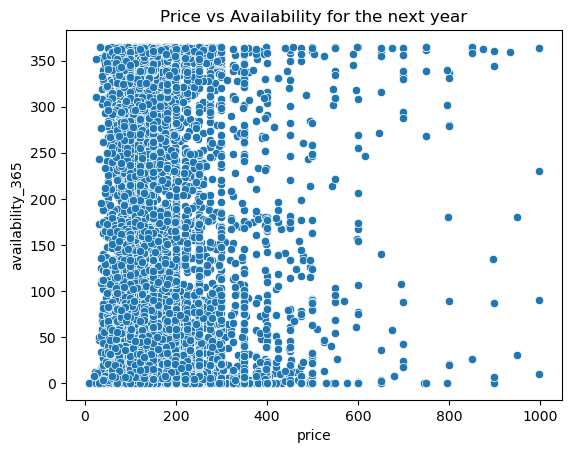

In [20]:
sns.scatterplot(data=reviews_dataset_num,x='price',y='availability_365')
plt.title('Price vs Availability for the next year')

Text(0.5, 1.0, 'Price vs Reviews per month')

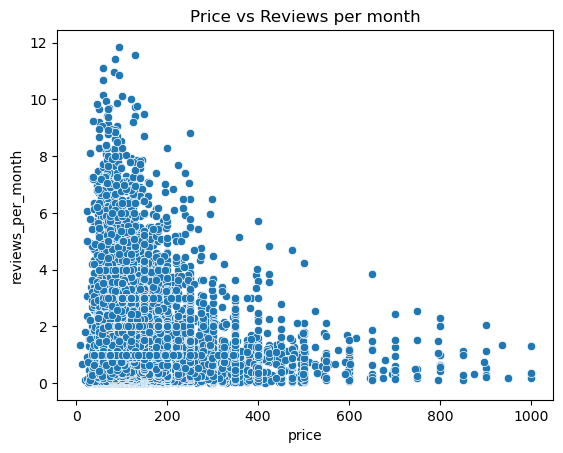

In [22]:
sns.scatterplot(data=reviews_dataset_num,x='price',y='reviews_per_month')
plt.title('Price vs Reviews per month')

Text(0.5, 1.0, 'Price vs Number of Reviews')

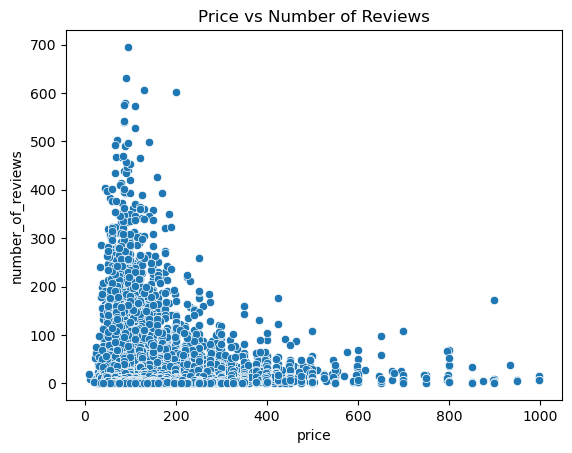

In [23]:
sns.scatterplot(data=reviews_dataset_num,x='price',y='number_of_reviews')
plt.title('Price vs Number of Reviews')

In [1]:
sns.scatterplot(data=reviews_dataset_num,x='price',y='review_scores_rating')
plt.title('Price vs Review Score')

NameError: name 'sns' is not defined

Text(0.5, 1.0, 'Number of Reviews vs Availability for the next year')

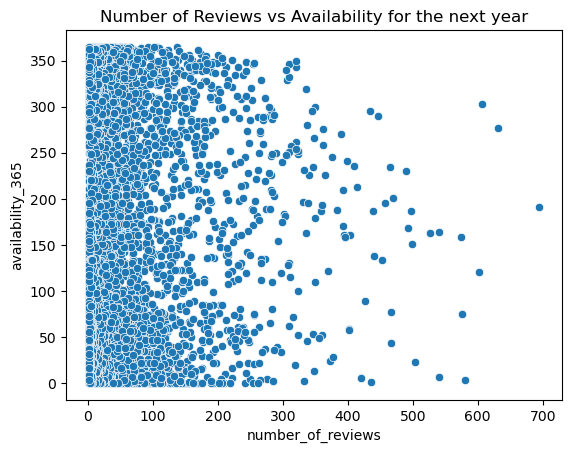

In [21]:
sns.scatterplot(data=reviews_dataset_num,x='number_of_reviews',y='availability_365')
plt.title('Number of Reviews vs Availability for the next year')

### 6. Creating Arrays for analysis

In [26]:
X = reviews_dataset_num['price'].values.reshape(-1,1)
y = reviews_dataset_num['number_of_reviews'].values.reshape(-1,1)

In [27]:
X

array([[ 59],
       [160],
       [ 80],
       ...,
       [ 35],
       [212],
       [ 40]], dtype=int64)

In [28]:
y

array([[248],
       [ 42],
       [233],
       ...,
       [  1],
       [  1],
       [  1]], dtype=int64)

In [29]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 7. Regression Analysis

In [30]:
# Create a regression object.
price_nreviews_regression = LinearRegression()

In [32]:
# Fit the regression object onto the training set.

price_nreviews_regression.fit(X_train,y_train)

LinearRegression()

In [33]:
# Predict the values of y using X.

y_predicted = price_nreviews_regression.predict(X_test)

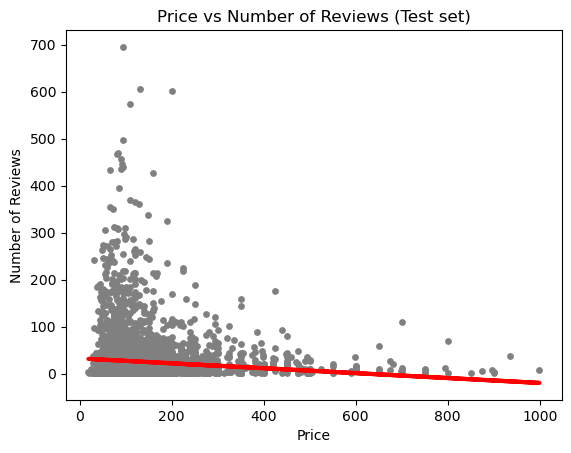

In [34]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Number of Reviews (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Number of Reviews')
plot_test.show()

The fit is not good. We can see that for low prices there is a super broad range of number pf reviews, from 0 to 700, and this model only predicts the low end of the number of reviews.

In [35]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,price_nreviews_regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.05217413]]
Mean squared error:  2178.7526080679963
R2 score:  0.00950590330128498


In [38]:
# Create dataframe with the actual values from the test set and the predictions to assess fit
predicted_vs_actual = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted' : y_predicted.flatten()})
predicted_vs_actual

,Actual,Predicted
0,23,16.923025
1,110,29.392641
2,128,28.610029
3,2,28.610029
4,3,27.044806
...,...,...
5117,8,26.262194
5118,5,28.349159
5119,6,28.870900
5120,50,23.705662


Slope: -0.05217413

Mean squared error:  2178.7526080679963
R2 score:  0.009505903301284

Looking at the slope we can see that the model estimates that as the price increases, the number of reviews decreases.
However, the MSE is much larger than our range of data for the reviews 0-700, so we can see that this is not a good fit.
The R2 score is smaller than 0.01 so we can see that the fit is very bad.

There is little to be done in this case outside of finding a different model that could fit the data better, as the current spread of data doesn't seem to show any very clear outliers.98